In [10]:
import os

In [11]:
os.getcwd()

'/resources/labs/Capstone'

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Libraries imported.


In [2]:
import pandas as pd 
import numpy as np
import requests

csv = "UpdatedAustinZipcodes.csv"

df = pd.read_csv(csv)

df.head()

,ZipCode,Neighborhood,Lat,Long,HousingCost
0,78744,"Dove Springs, Southeast Austin",30.1876,-97.7472,101990
1,78741,"East Riverside-Oltorf, Montopolis",30.2315,-97.7223,133822
2,78758,"North Burnet, Gracy Woods",30.3764,-97.7078,147457
3,78753,Windsor Hills,30.3648,-97.6827,150718
4,78745,"Battle Bend Springs, East Congress, West Congr...",30.2063,-97.7956,151641


In [3]:
csv = "UpdatedAustinZipcodes_edited.csv"

overlay = pd.read_csv(csv)

overlay.head()

,ZipCode,Neighborhood,Lat,Long,HousingCost
0,78744,"Dove Springs, Southeast Austin",30.1876,-97.7472,101990
1,78741,"East Riverside-Oltorf, Montopolis",30.2315,-97.7223,133822
2,78758,"North Burnet, Gracy Woods",30.3764,-97.7078,147457
3,78753,Windsor Hills,30.3648,-97.6827,150718
4,78745,"Battle Bend Springs, East Congress, West Congr...",30.2063,-97.7956,151641


In [4]:
pip install geopy

     |████████████████████████████████| 112kB 6.1MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [6]:
from geopy.geocoders import Nominatim
import folium

In [7]:
address = 'Austin, Tx'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Austin is {}, {}.'.format(latitude, longitude))

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinate of Austin is 30.2711286, -97.7436995.


In [8]:
map_austin = folium.Map(location=[latitude, longitude], zoom_start=9.5)

# add markers to map
for lat, lng, borough in zip(df['Lat'], df['Long'], df['Neighborhood']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_austin)  
    
map_austin

In [9]:
CLIENT_ID = '43SWZRWFYYAB1AIAHCTAI4XHL5W2XBFGJAYUDJD1J1QPINB3' # my Foursquare ID
CLIENT_SECRET = 'J55JNPUKJ2GGQRNVQNLX0WD3D5CFIDO3F4UGUOYU02VP0XLI' # my Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 43SWZRWFYYAB1AIAHCTAI4XHL5W2XBFGJAYUDJD1J1QPINB3
CLIENT_SECRET:J55JNPUKJ2GGQRNVQNLX0WD3D5CFIDO3F4UGUOYU02VP0XLI


In [10]:
austin_data = df

borough_latitude = austin_data.loc[0, 'Lat'] # neighborhood latitude value
borough_longitude = austin_data.loc[0, 'Long'] # neighborhood longitude value

borough_name = austin_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(borough_name, 
                                                               borough_latitude, 
                                                               borough_longitude))

Latitude and longitude values of Dove Springs, Southeast Austin are 30.1876, -97.7472.


In [11]:
LIMIT = 100
radius = 55000
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    borough_latitude, 
    borough_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=43SWZRWFYYAB1AIAHCTAI4XHL5W2XBFGJAYUDJD1J1QPINB3&client_secret=J55JNPUKJ2GGQRNVQNLX0WD3D5CFIDO3F4UGUOYU02VP0XLI&v=20180605&ll=30.1876,-97.7472&radius=55000&limit=100'

In [12]:
results = requests.get(url).json()

In [13]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [14]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Cosmic Coffee + Beer Garden,Coffee Shop,30.226882,-97.762536
1,Lady Bird Lake Boardwalk Trail,Pedestrian Plaza,30.246597,-97.730338
2,El Primo Taco Truck,Food Truck,30.245016,-97.757393
3,Whole Earth Provision Company,Shoe Store,30.231258,-97.797953
4,Home Slice Pizza,Pizza Place,30.249004,-97.749758


In [15]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


In [16]:
def getNearbyVenues(names, latitudes, longitudes, radius=800, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [17]:
austin_venues = getNearbyVenues(names=austin_data['Neighborhood'],
                                   latitudes=austin_data['Lat'],
                                   longitudes=austin_data['Long']
                                  )

Dove Springs, Southeast Austin
East Riverside-Oltorf, Montopolis
North Burnet, Gracy Woods
Windsor Hills
Battle Bend Springs, East Congress, West Congress, South Congress, South Manchaca, Cherry Creek, Kincheonville, Sunset Valley (incorporated city), Westgate
Wells Branch
Onion Creek
Original Austin
Windsor Park, Mueller
Southpark Meadows, Far South Austin/Slaughter-Manchaca, Tanglewood Forest
Central East Austin, East Cesar Chavez, Govalle
Maple Run, Sendera, Woodstone Village, Oak Hill
Allandale, North Shoal Creek, Crestview, Wooten
French Place
Barton Hills, Bouldin Creek, Galindo, South Lamar*Spyglass-Barton's Bluffs, Travis Heights, Zilker, South River City
North University, Shoal Crest, Lower Waller Creek
Travis Country, Barton Creek
Balcones Woods, Barrington Oaks, Great Hills/Arboretum
Estates of Brentwood, Canyon Creek
Rosedale, Brentwood
Hyde Park, North Campus, North Loop
Circle C Ranch, Shady Hollow
Downtown Austin, Judges' Hill, Old Pecan Street
Ridgetop, Steiner Ranch
Oa

In [18]:
print(austin_venues.shape)
austin_venues

(720, 7)


,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Dove Springs, Southeast Austin",30.1876,-97.7472,Redbox,30.193995,-97.744820,Video Store
1,"Dove Springs, Southeast Austin",30.1876,-97.7472,Stassney & Pleasant Valley,30.193985,-97.744629,Intersection
2,"Dove Springs, Southeast Austin",30.1876,-97.7472,Fruitlandia,30.180719,-97.747339,Mexican Restaurant
3,"Dove Springs, Southeast Austin",30.1876,-97.7472,Texas Reliable Services,30.184080,-97.754140,Home Service
4,"Dove Springs, Southeast Austin",30.1876,-97.7472,Stassney / Nuckols Crossing,30.190723,-97.739941,Intersection
5,"Dove Springs, Southeast Austin",30.1876,-97.7472,Mi Victoria Bakery,30.180493,-97.747866,Mexican Restaurant
6,"East Riverside-Oltorf, Montopolis",30.2315,-97.7223,888 Vietnamese Restaurant,30.229627,-97.730117,Vietnamese Restaurant
7,"East Riverside-Oltorf, Montopolis",30.2315,-97.7223,El Super Taco,30.230419,-97.730210,Food Truck
8,"East Riverside-Oltorf, Montopolis",30.2315,-97.7223,Twin Liquors,30.234994,-97.720449,Liquor Store
9,"East Riverside-Oltorf, Montopolis",30.2315,-97.7223,Wells Fargo Bank,30.235286,-97.721015,Bank


In [19]:
austin_venues.groupby('Borough').count()

,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Borough,,,,,,
"Allandale, North Shoal Creek, Crestview, Wooten",39,39,39,39,39,39
"Balcones Woods, Barrington Oaks, Great Hills/Arboretum",51,51,51,51,51,51
"Barton Hills, Bouldin Creek, Galindo, South Lamar*Spyglass-Barton's Bluffs, Travis Heights, Zilker, South River City",58,58,58,58,58,58
"Battle Bend Springs, East Congress, West Congress, South Congress, South Manchaca, Cherry Creek, Kincheonville, Sunset Valley (incorporated city), Westgate",5,5,5,5,5,5
"Central East Austin, East Cesar Chavez, Govalle",67,67,67,67,67,67
"Circle C Ranch, Shady Hollow",1,1,1,1,1,1
"Dove Springs, Southeast Austin",6,6,6,6,6,6
"Downtown Austin, Judges' Hill, Old Pecan Street",90,90,90,90,90,90
"East Riverside-Oltorf, Montopolis",27,27,27,27,27,27


In [20]:
print('There are {} unique categories.'.format(len(austin_venues['Venue Category'].unique())))

There are 193 unique categories.


In [21]:
summary = austin_venues.groupby('Borough').count().reset_index()
summary['Count'] = summary['Venue']
summary = summary.drop(['Borough Latitude', 'Borough Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude','Venue Category'], axis=1)
summary = summary.sort_values('Count').reset_index(drop=True)
summary.head()

,Borough,Count
0,"Circle C Ranch, Shady Hollow",1
1,Onion Creek,2
2,"North Burnet, Gracy Woods",4
3,"Maple Run, Sendera, Woodstone Village, Oak Hill",5
4,"Battle Bend Springs, East Congress, West Congr...",5


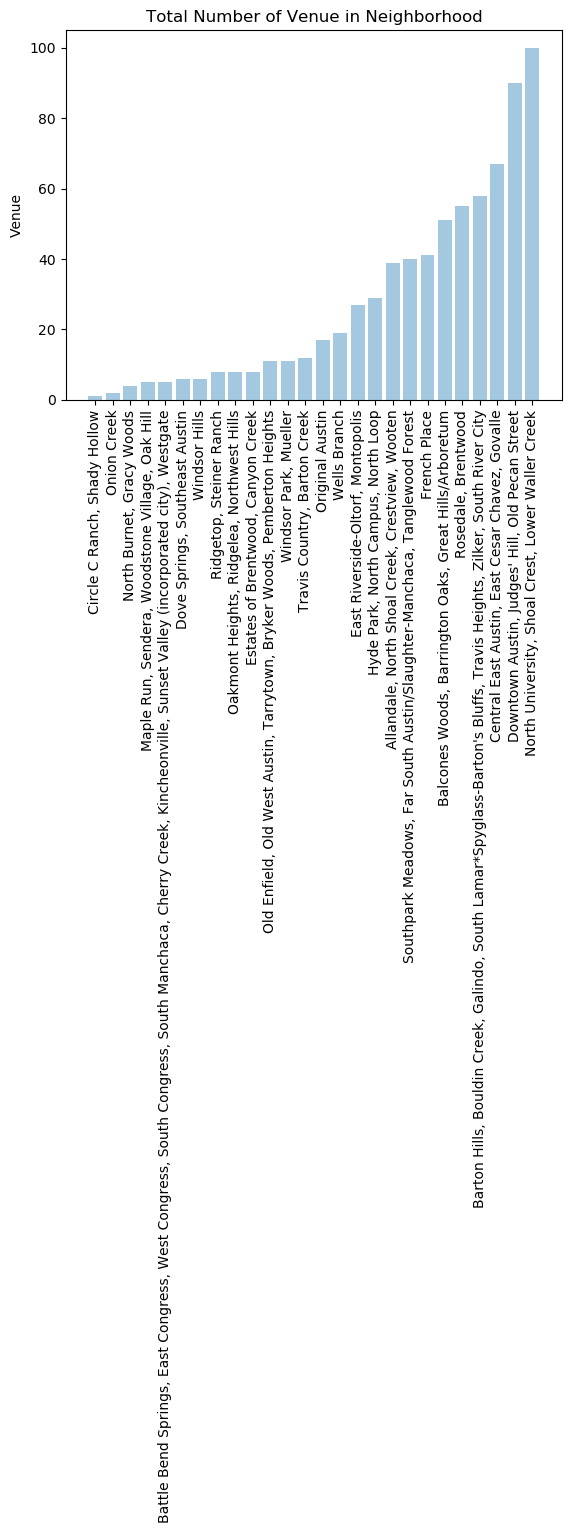

In [22]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = summary.Borough
y_pos = np.arange(len(objects))
performance = summary.Count

plt.bar(y_pos, performance, align='center', alpha=0.4)
plt.xticks(y_pos, objects)
plt.ylabel('Venue')
plt.title('Total Number of Venue in Neighborhood')
plt.xticks(rotation=90)

plt.show()

In [23]:
print('There are {} uniques categories.'.format(len(austin_venues['Venue Category'].unique())))

There are 193 uniques categories.


In [24]:
# one hot encoding
austin_onehot = pd.get_dummies(austin_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
austin_onehot['Borough'] = austin_venues['Borough'] 

# move neighborhood column to the first column
list_column = austin_onehot.columns.tolist()
number_column = int(list_column.index('Borough'))
list_column = [list_column[number_column]] + list_column[:number_column] + list_column[number_column+1:] 
austin_onehot = austin_onehot[list_column]

austin_onehot.head()

,Borough,Adult Boutique,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Capitol Building,Cheese Shop,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Bookstore,College Cafeteria,College Quad,Comedy Club,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Daycare,Deli / Bodega,Dessert Shop,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Electronics Store,Event Service,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fishing Store,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gift Shop,Golf Driving Range,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Harbor / Marina,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Insurance Office,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Lighthouse,Lingerie Store,Liquor Store,Lounge,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Museum,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Optical Shop,Outdoor Sculpture,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Playground,Pool,Pool Hall,Pub,Public Art,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Rock Club,Roof Deck,Russian Restaurant,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Smoke Shop,Smoothie Shop,Soccer Field,South American Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Storage Facility,Student Center,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Trade School,Trail,Turkish Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,"Dove Springs, Southeast Austin",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,"Dove Springs, Southeast Austin",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Dove Springs, Southeast Austin",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Dove Springs, Southeast Austin",0,0,

In [25]:
austin_onehot.shape

(720, 194)

In [26]:
austin_grouped = austin_onehot.groupby('Borough').mean().reset_index()
austin_grouped

,Borough,Adult Boutique,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Capitol Building,Cheese Shop,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Bookstore,College Cafeteria,College Quad,Comedy Club,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Daycare,Deli / Bodega,Dessert Shop,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Electronics Store,Event Service,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fishing Store,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gift Shop,Golf Driving Range,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Harbor / Marina,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Insurance Office,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Lighthouse,Lingerie Store,Liquor Store,Lounge,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Museum,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Optical Shop,Outdoor Sculpture,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Playground,Pool,Pool Hall,Pub,Public Art,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Rock Club,Roof Deck,Russian Restaurant,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Smoke Shop,Smoothie Shop,Soccer Field,South American Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Storage Facility,Student Center,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Trade School,Trail,Turkish Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,"Allandale, North Shoal Creek, Crestview, Wooten",0.00000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.025641,0.000000,0.000000,0.000000,0.000000,0.051282,0.000000,0.051282,0.000000,0.000000,0.025641,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.025641,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00,0.000000,0.025641,0.025641,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025641,0.000000,0.000000,0.000000,0.000,0.025641,0.00,0.051282,0.00,0.000000,0.025641,0.000000,0.000000,0.025641,0.000000,0.00000,0.000000,0.000000,0.051282,0.025641,0.000000,0.000000,0.000000,0.000000,0.025641,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.051282,0.000000,0.000,0.000000,0.000000,0.025641,0.000000,0.025641,0.025641,0.025641,0.000000,0.000000,0.00000,0.000000,0.025641,0.000000,0.000000,0.000000,0.000000,0.025641,0.000000,0.000000,0.000000,0.000000,0.025641,0.000000,0.00,0.000000,0.000000,0.000000,0.025641,0.000000,0.00,0.00,0.025641,0.025641,0.000000,0.000000,0.025641,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.0000

In [27]:
austin_grouped.shape

(26, 194)

In [28]:
num_top_venues = 5

for hood in austin_grouped['Borough']:
    print("----"+hood+"----")
    temp = austin_grouped[austin_grouped['Borough'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allandale, North Shoal Creek, Crestview, Wooten----
            venue  freq
0     Pizza Place  0.08
1      Food Truck  0.05
2          Bakery  0.05
3   Grocery Store  0.05
4  Ice Cream Shop  0.05


----Balcones Woods, Barrington Oaks, Great Hills/Arboretum----
                  venue  freq
0     Indian Restaurant  0.08
1        Cosmetics Shop  0.06
2  Fast Food Restaurant  0.06
3           Pizza Place  0.06
4  Gym / Fitness Center  0.06


----Barton Hills, Bouldin Creek, Galindo, South Lamar*Spyglass-Barton's Bluffs, Travis Heights, Zilker, South River City----
                venue  freq
0          Food Truck  0.09
1  Mexican Restaurant  0.07
2         Pizza Place  0.07
3                Park  0.05
4     Automotive Shop  0.03


----Battle Bend Springs, East Congress, West Congress, South Congress, South Manchaca, Cherry Creek, Kincheonville, Sunset Valley (incorporated city), Westgate----
                     venue  freq
0               Food Truck   0.4
1        Convenience Store  

In [29]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [30]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
boroughs_venues_sorted = pd.DataFrame(columns=columns)
boroughs_venues_sorted['Borough'] = austin_grouped['Borough']

for ind in np.arange(austin_grouped.shape[0]):
    boroughs_venues_sorted.iloc[ind, 1:] = return_most_common_venues(austin_grouped.iloc[ind, :], num_top_venues)

boroughs_venues_sorted

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Allandale, North Shoal Creek, Crestview, Wooten",Pizza Place,Grocery Store,Food Truck,Spa,Ice Cream Shop,Bar,Bakery,Gym,Fast Food Restaurant,Jewelry Store
1,"Balcones Woods, Barrington Oaks, Great Hills/A...",Indian Restaurant,Fast Food Restaurant,Gym / Fitness Center,Cosmetics Shop,Pizza Place,Chinese Restaurant,Mobile Phone Shop,Pet Store,Bakery,Rental Car Location
2,"Barton Hills, Bouldin Creek, Galindo, South La...",Food Truck,Pizza Place,Mexican Restaurant,Park,Gym / Fitness Center,Bar,Taco Place,Coffee Shop,Thai Restaurant,Automotive Shop
3,"Battle Bend Springs, East Congress, West Congr...",Food Truck,Convenience Store,Bakery,Health & Beauty Service,Field,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Event Space
4,"Central East Austin, East Cesar Chavez, Govalle",Coffee Shop,Mexican Restaurant,Cocktail Bar,Convenience Store,Brewery,Bar,Food Truck,Pub,Pizza Place,Fast Food Restaurant
5,"Circle C Ranch, Shady Hollow",Roof Deck,Yoga Studio,Donut Shop,Field,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Event Space,Event Service
6,"Dove Springs, Southeast Austin",Intersection,Mexican Restaurant,Home Service,Video Store,Dry Cleaner,Fishing Store,Field,Fast Food Restaurant,Farmers Market,Farm
7,"Downtown Austin, Judges' Hill, Old Pecan Street",Coffee Shop,Hotel,Bar,Cocktail Bar,Nightclub,Capitol Building,Lounge,Hotel Bar,New American Restaurant,Seafood Restaurant
8,"East Riverside-Oltorf, Montopolis",Bank,Pizza Place,Cosmetics Shop,Liquor Store,Video Store,Food Truck,Bus Station,Fast Food Restaurant,Mobile Phone Shop,Intersection
9,"Estates of Brentwood, Canyon Creek",Gym,Pool,Playground,Trail,Dog Run,Home Service,Art Museum,Dry Cleaner,Fishing Store,Field


In [31]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
# set number of clusters
kclusters = 5

austin_grouped_clustering = austin_grouped.drop('Borough', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(austin_grouped_clustering)

# check cluster labels generated for each row in the dataframe
labels = kmeans.labels_[0:10]

In [33]:
labels

array([2, 2, 2, 1, 2, 4, 2, 2, 2, 0], dtype=int32)

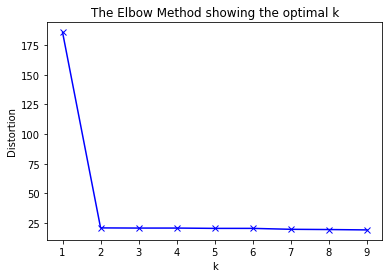

In [34]:
from scipy.spatial.distance import cdist

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(austin_grouped_clustering)
    #kmeanModel.fit(istanbul_grouped_clustering)
    distortions.append(sum(np.min(cdist(austin_grouped_clustering, kmeanModel.cluster_centers_, 'canberra'), axis=1)) / austin_grouped_clustering.shape[0])

#There are different metric distance function for spatial distance. 
#I choose correlation instaed of euclidean because the canberra function gives me more clear view of elbow break point.

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [35]:
austin_merged = austin_data

# add clustering labels
austin_merged['Cluster Labels'] = kmeans.labels_

# merge austin_grouped with austin_data to add latitude/longitude for each neighborhood
austin_merged = austin_merged.join(boroughs_venues_sorted.set_index('Borough'), on='Neighborhood')

austin_merged # check the last columns!

,ZipCode,Neighborhood,Lat,Long,HousingCost,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,78744,"Dove Springs, Southeast Austin",30.1876,-97.7472,101990,2,Intersection,Mexican Restaurant,Home Service,Video Store,Dry Cleaner,Fishing Store,Field,Fast Food Restaurant,Farmers Market,Farm
1,78741,"East Riverside-Oltorf, Montopolis",30.2315,-97.7223,133822,2,Bank,Pizza Place,Cosmetics Shop,Liquor Store,Video Store,Food Truck,Bus Station,Fast Food Restaurant,Mobile Phone Shop,Intersection
2,78758,"North Burnet, Gracy Woods",30.3764,-97.7078,147457,2,Convenience Store,Grocery Store,Mexican Restaurant,Pizza Place,Fishing Store,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Event Space
3,78753,Windsor Hills,30.3648,-97.6827,150718,1,Furniture / Home Store,Flea Market,Storage Facility,Rental Car Location,Electronics Store,Dry Cleaner,Field,Fast Food Restaurant,Farmers Market,Farm
4,78745,"Battle Bend Springs, East Congress, West Congr...",30.2063,-97.7956,151641,2,Food Truck,Convenience Store,Bakery,Health & Beauty Service,Field,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Event Space
5,78728,Wells Branch,30.4417,-97.6811,186414,4,Park,Seafood Restaurant,Bakery,Pizza Place,Donut Shop,Mexican Restaurant,Brazilian Restaurant,Lake,Event Space,Chinese Restaurant
6,78747,Onion Creek,30.1204,-97.7433,197620,2,Construction & Landscaping,Lake,Yoga Studio,Dry Cleaner,Fishing Store,Field,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant
7,78727,Original Austin,30.4254,-97.7195,207399,2,Gym,Bank,Coffee Shop,Sushi Restaurant,Food Truck,Gas Station,Pharmacy,Bakery,Thai Restaurant,Intersection
8,78723,"Windsor Park, Mueller",30.3085,-97.6849,208624,2,Cosmetics Shop,Gym / Fitness Center,Pizza Place,Ice Cream Shop,Grocery Store,Food Truck,Food & Drink Shop,Mobile Phone Shop,Home Service,Athletics & Sports
9,78748,"Southpark Meadows, Far South Austin/Slaughter-...",30.1743,-97.8225,216406,0,Martial Arts Dojo,Video Store,Pharmacy,Beer Garden,Fast Food Restaurant,Discount Store,Athletics & Sports,Sandwich Place,Grocery Store,Pizza Place


In [36]:
count_venue = austin_merged
count_venue = count_venue.drop(['Neighborhood','HousingCost', 'Lat', 'Long'], axis=1)
count_venue = count_venue.groupby(['Cluster Labels','1st Most Common Venue']).size().reset_index(name='Counts')

#we can transpose it to plot bar chart
cv_cluster = count_venue.pivot(index='Cluster Labels', columns='1st Most Common Venue', values='Counts')
cv_cluster = cv_cluster.fillna(0).astype(int).reset_index(drop=True)
cv_cluster

1st Most Common Venue,Bank,Bus Stop,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Food Truck,Furniture / Home Store,Gas Station,Gym,Indian Restaurant,Intersection,Martial Arts Dojo,Park,Pizza Place,Playground,Pool,Roof Deck,Taco Place
0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,1,2,1,1,1,2,0,1,3,0,1,0,1,0,1,1,1,1
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


Text(0, 0.5, 'Clusters')

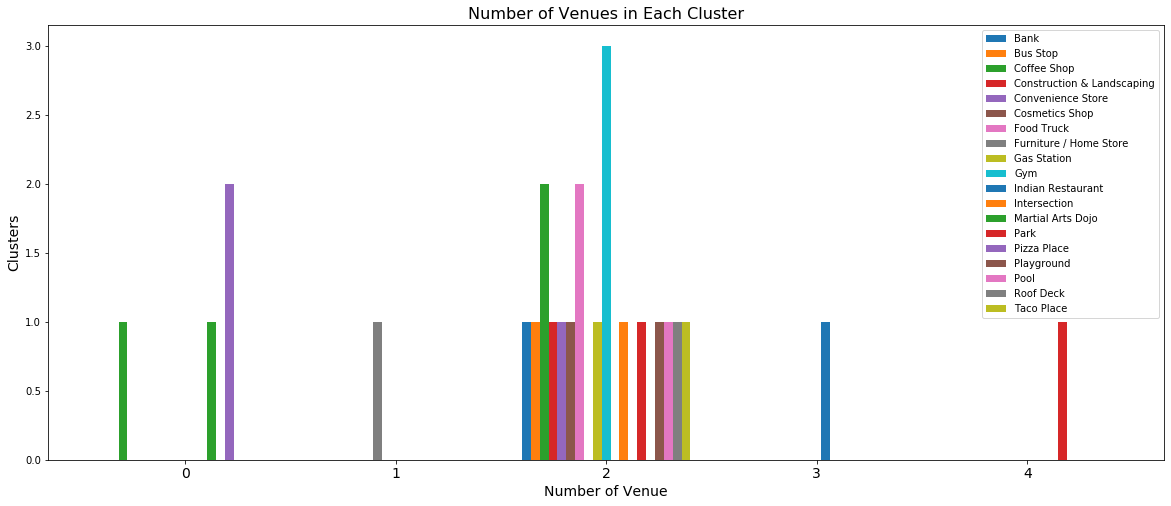

In [37]:
#creating a bar chart of "Number of Venues in Each Cluster"
frame=cv_cluster.plot(kind='bar',figsize=(20,8),width = 0.8)

plt.legend(labels=cv_cluster.columns,fontsize= 10)
plt.title("Number of Venues in Each Cluster",fontsize= 16)
plt.xticks(fontsize=14)
plt.xticks(rotation=0)
plt.xlabel('Number of Venue', fontsize=14)
plt.ylabel('Clusters', fontsize=14)

In [38]:
Cluster_labels = {'Clusters': [0,1,2,3,4], 'Labels': ["Pizza / Coffee","Home Stores","Total Austin","Indian Restaurants","Parks"]}
Cluster_labels = pd.DataFrame(data=Cluster_labels)
Cluster_labels

,Clusters,Labels
0,0,Pizza / Coffee
1,1,Home Stores
2,2,Total Austin
3,3,Indian Restaurants
4,4,Parks


In [39]:
data_process = df.sort_values('HousingCost').reset_index(drop=True)
data_process = data_process.drop(['Lat', 'Long'], axis=1)
data_process.head()

,ZipCode,Neighborhood,HousingCost,Cluster Labels
0,78744,"Dove Springs, Southeast Austin",101990,2
1,78741,"East Riverside-Oltorf, Montopolis",133822,2
2,78758,"North Burnet, Gracy Woods",147457,2
3,78753,Windsor Hills,150718,1
4,78745,"Battle Bend Springs, East Congress, West Congr...",151641,2


In [40]:
data_process

,ZipCode,Neighborhood,HousingCost,Cluster Labels
0,78744,"Dove Springs, Southeast Austin",101990,2
1,78741,"East Riverside-Oltorf, Montopolis",133822,2
2,78758,"North Burnet, Gracy Woods",147457,2
3,78753,Windsor Hills,150718,1
4,78745,"Battle Bend Springs, East Congress, West Congr...",151641,2
5,78728,Wells Branch,186414,4
6,78747,Onion Creek,197620,2
7,78727,Original Austin,207399,2
8,78723,"Windsor Park, Mueller",208624,2
9,78748,"Southpark Meadows, Far South Austin/Slaughter-...",216406,0


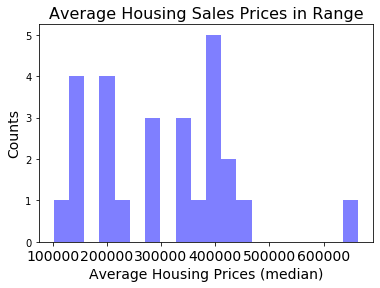

In [41]:
num_bins = 20
n, bins, patches = plt.hist(data_process['HousingCost'], num_bins, facecolor='blue', alpha=0.5)
plt.title("Average Housing Sales Prices in Range",fontsize= 16)
plt.xticks(fontsize=14)
plt.xticks(rotation=0)
plt.xlabel('Average Housing Prices (median)', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.show()

In [42]:
level = []
for i in range(0,len(data_process)):
    if (data_process['HousingCost'][i] < 150000):
        level.append("Low Level HC")
    elif (data_process['HousingCost'][i] >= 150001 and data_process['HousingCost'][i] < 300000):
        level.append("Mid-1 Level HC")
    elif (data_process['HousingCost'][i] >= 300001 and data_process['HousingCost'][i] < 450000):
        level.append("Mid-2 Level HC")
    elif (data_process['HousingCost'][i] >= 450001 and data_process['HousingCost'][i] < 600000):
        level.append("High-1 Level HC")
    else:
        level.append("High-2 Level HC")   

data_process['Level_labels'] = level
data_process.head()

,ZipCode,Neighborhood,HousingCost,Cluster Labels,Level_labels
0,78744,"Dove Springs, Southeast Austin",101990,2,Low Level HC
1,78741,"East Riverside-Oltorf, Montopolis",133822,2,Low Level HC
2,78758,"North Burnet, Gracy Woods",147457,2,Low Level HC
3,78753,Windsor Hills,150718,1,Mid-1 Level HC
4,78745,"Battle Bend Springs, East Congress, West Congr...",151641,2,Mid-1 Level HC


In [43]:
top3 = austin_venues.groupby(['Borough','Venue Category']).size().reset_index(name='Counts')
top3 = top3.sort_values(['Borough','Counts'],ascending=False).groupby('Borough').head(3).reset_index(drop=True)

top3['Join'] = top3['Counts'].map(str) + " " + top3['Venue Category']
top3 = top3.groupby(['Borough'])['Join'].apply(", ".join).reset_index()

top3.head()

,Borough,Join
0,"Allandale, North Shoal Creek, Crestview, Wooten","3 Pizza Place, 2 Bakery, 2 Bar"
1,"Balcones Woods, Barrington Oaks, Great Hills/A...","4 Indian Restaurant, 3 Cosmetics Shop, 3 Fast ..."
2,"Barton Hills, Bouldin Creek, Galindo, South La...","5 Food Truck, 4 Mexican Restaurant, 4 Pizza Place"
3,"Battle Bend Springs, East Congress, West Congr...","2 Food Truck, 1 Bakery, 1 Convenience Store"
4,"Central East Austin, East Cesar Chavez, Govalle","4 Coffee Shop, 4 Mexican Restaurant, 3 Bar"


In [44]:
import numpy as np

result = pd.merge(austin_merged, 
                    top3[['Borough', 'Join']],
                    left_on = 'Neighborhood',
                    right_on = 'Borough',
                    how = 'left')
result= pd.merge(result, 
                    Cluster_labels[['Clusters', 'Labels']],
                    left_on = 'Cluster Labels',
                    right_on = 'Clusters',
                    how = 'left')
result = pd.merge(result, 
                    data_process[['Neighborhood', 'Level_labels']],
                    left_on = 'Neighborhood',
                    right_on = 'Neighborhood',
                    how = 'left')

result = result.drop(['Clusters'], axis=1)
result

,ZipCode,Neighborhood,Lat,Long,HousingCost,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Borough,Join,Labels,Level_labels
0,78744,"Dove Springs, Southeast Austin",30.1876,-97.7472,101990,2,Intersection,Mexican Restaurant,Home Service,Video Store,Dry Cleaner,Fishing Store,Field,Fast Food Restaurant,Farmers Market,Farm,"Dove Springs, Southeast Austin","2 Intersection, 2 Mexican Restaurant, 1 Home S...",Total Austin,Low Level HC
1,78741,"East Riverside-Oltorf, Montopolis",30.2315,-97.7223,133822,2,Bank,Pizza Place,Cosmetics Shop,Liquor Store,Video Store,Food Truck,Bus Station,Fast Food Restaurant,Mobile Phone Shop,Intersection,"East Riverside-Oltorf, Montopolis","2 Bank, 2 Cosmetics Shop, 2 Food Truck",Total Austin,Low Level HC
2,78758,"North Burnet, Gracy Woods",30.3764,-97.7078,147457,2,Convenience Store,Grocery Store,Mexican Restaurant,Pizza Place,Fishing Store,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Event Space,"North Burnet, Gracy Woods","1 Convenience Store, 1 Grocery Store, 1 Mexica...",Total Austin,Low Level HC
3,78753,Windsor Hills,30.3648,-97.6827,150718,1,Furniture / Home Store,Flea Market,Storage Facility,Rental Car Location,Electronics Store,Dry Cleaner,Field,Fast Food Restaurant,Farmers Market,Farm,Windsor Hills,"2 Furniture / Home Store, 1 Electronics Store,...",Home Stores,Mid-1 Level HC
4,78745,"Battle Bend Springs, East Congress, West Congr...",30.2063,-97.7956,151641,2,Food Truck,Convenience Store,Bakery,Health & Beauty Service,Field,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Event Space,"Battle Bend Springs, East Congress, West Congr...","2 Food Truck, 1 Bakery, 1 Convenience Store",Total Austin,Mid-1 Level HC
5,78728,Wells Branch,30.4417,-97.6811,186414,4,Park,Seafood Restaurant,Bakery,Pizza Place,Donut Shop,Mexican Restaurant,Brazilian Restaurant,Lake,Event Space,Chinese Restaurant,Wells Branch,"2 Bakery, 2 Park, 2 Seafood Restaurant",Parks,Mid-1 Level HC
6,78747,Onion Creek,30.1204,-97.7433,197620,2,Construction & Landscaping,Lake,Yoga Studio,Dry Cleaner,Fishing Store,Field,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Onion Creek,"1 Construction & Landscaping, 1 Lake",Total Austin,Mid-1 Level HC
7,78727,Original Austin,30.4254,-97.7195,207399,2,Gym,Bank,Coffee Shop,Sushi Restaurant,Food Truck,Gas Station,Pharmacy,Bakery,Thai Restaurant,Intersection,Original Austin,"2 Gym, 1 Bakery, 1 Bank",Total Austin,Mid-1 Level HC
8,78723,"Windsor Park, Mueller",30.3085,-97.6849,208624,2,Cosmetics Shop,Gym / Fitness Center,Pizza Place,Ice Cream Shop,Grocery Store,Food Truck,Food & Drink Shop,Mobile Phone Shop,Home Service,Athletics & Sports,"Windsor Park, Mueller","2 Cosmetics Shop, 2 Gym / Fitness Center, 1 Fo...",Total Austin,Mid-1 Level HC
9,78748,"Southpark Meadows, Far South Austin/Slaughter-...",30.1743,-97.8225,216406,0,Martial Arts Dojo,Video Store,Pharmacy,Beer Garden,Fast Food Restaurant,Discount Store,Athletics & Sports,Sandwich Place,Grocery Store,Pizza Place,"Southpark Meadows, Far South Austin/Slaughter-...","2 Athletics & Sports, 2 Beer Garden, 2 Discoun...",Pizza / Coffee,Mid-1 Level HC


In [45]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=9.5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, join, cluster_number, label in zip(result['Lat'], result['Long'], result['Borough'], result['Labels'], result['Join'], result['Cluster Labels'], result['Level_labels']):
    label = folium.Popup(str(poi) + " / " + str(cluster) + "-" + str(label) + " / " + str(join), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        color= rainbow[cluster_number-1],
        popup=label,
        fill_color = rainbow[cluster_number-1],
        fill_opacity=1).add_to(map_clusters)
       
map_clusters

In [46]:
!wget --quiet https://raw.githubusercontent.com/jeff-mos-def/DataFiles/master/austin_area_zip_codes.geojson_edited.json
 
print('GeoJSON file downloaded!')

austin_geo = r'austin_area_zip_codes.geojson_edited.json'

latitude = 30.2711286
longitude = -97.7436995

austin_map = folium.Map(location=[latitude, longitude], zoom_start=10)

GeoJSON file downloaded!


In [47]:
austin_map.choropleth(
    geo_data=austin_geo,
    data=overlay,
    columns=['ZipCode','HousingCost'],
    key_on='feature.properties.zipcode',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Median Home Prices in Austin, Tx',
    highlight=True
)

markers_colors = []
for lat, lon, poi, cluster, join, cluster_number, label in zip(result['Lat'], result['Long'], result['Neighborhood'], result['Labels'], result['Join'], result['Cluster Labels'], result['Level_labels']):
    label = folium.Popup(str(poi) + " / " + str(cluster) + "-" + str(label) + " / " + str(join), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color= rainbow[cluster_number-1],
        fill=True,
        fill_color= rainbow[cluster_number-1],
        fill_opacity=1).add_to(austin_map)
   
austin_map

In [129]:
overlay

,ZipCode,Neighborhood,Lat,Long,HousingCost
0,78744,"Dove Springs, Southeast Austin",30.1876,-97.7472,101990
1,78741,"East Riverside-Oltorf, Montopolis",30.2315,-97.7223,133822
2,78758,"North Burnet, Gracy Woods",30.3764,-97.7078,147457
3,78753,Windsor Hills,30.3648,-97.6827,150718
4,78745,"Battle Bend Springs, East Congress, West Congr...",30.2063,-97.7956,151641
5,78728,Wells Branch,30.4417,-97.6811,186414
6,78747,Onion Creek,30.1204,-97.7433,197620
7,78727,Original Austin,30.4254,-97.7195,207399
8,78723,"Windsor Park, Mueller",30.3085,-97.6849,208624
9,78748,"Southpark Meadows, Far South Austin/Slaughter-...",30.1743,-97.8225,216406
